**Import the necessary libraries.**

In [2445]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import squarify
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math

**Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df**

In [2355]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

**First look at its main features (head, shape, info).**

In [2356]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [2357]:
customer_df.shape

(9134, 24)

In [2358]:
customer_df = customer_df.drop_duplicates()

In [2359]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

**Rename the columns so they are lower_case_with_underscores**

In [2360]:
lst = []
for i in customer_df.columns:
    if ' ' in i:
        i = i.replace(' ','_')
        lst.append(i.lower())
    else:
        lst.append(i.lower())
customer_df.columns = lst    

In [2361]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [2362]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df['day_week'] = customer_df['effective_to_date'].dt.day_of_week
customer_df['month'] = customer_df['month'].astype(str)
customer_df['day_week'] = customer_df['day_week'].astype(str)

In [2363]:
customer_df = customer_df.drop(['customer'], axis = 1) 

**Change effective to date column to datetime format.**

In [2364]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'].dtypes

dtype('<M8[ns]')

In [2365]:
customer_df.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [2366]:
customer_df['months_since_last_claim'] = customer_df['months_since_last_claim'].astype(str)
customer_df['months_since_policy_inception'] = customer_df['months_since_policy_inception'].astype(str)

In [2367]:
numerical = customer_df.select_dtypes(np.number)

**Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df**

In [2368]:
def contdisc(x):
    y = pd.DataFrame()
    z = pd.DataFrame()
    for i in x:
        if len(pd.unique(x[i].values.ravel('K'))) > 9:
            y[i] = x[i]
        else:
            z[i] = x[i]
    return y,z

In [2369]:
continuous_df,discrete_df = contdisc(numerical)

**Plot a correlation matrix, comment what you see.**

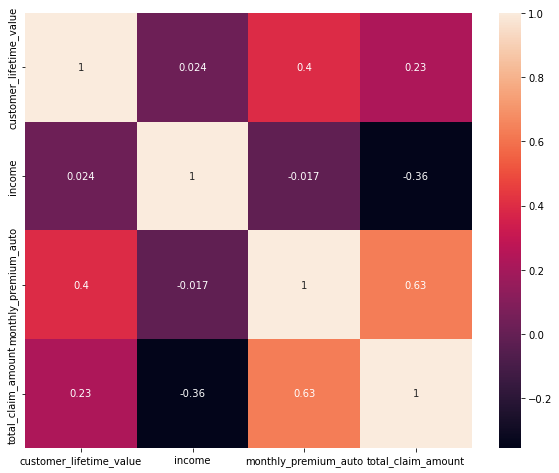

In [2370]:
corr_matrix=continuous_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

**Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)**

In [2371]:
def histplot(x):
    for i in x.columns:
        plt.title(i, fontsize=16)
        plt.figure()
        plt.hist(x[i])

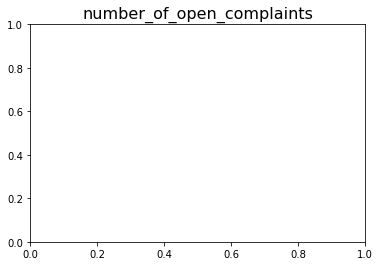

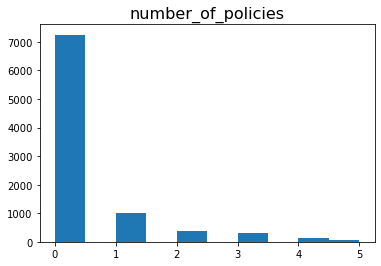

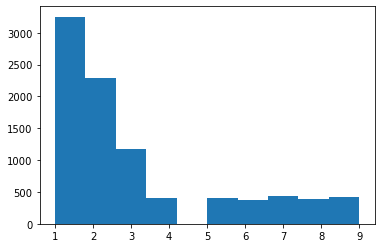

In [2372]:
histplot(discrete_df)

**Comment what you can see in the plots.**

The plots show a heavy imbalance with the car type, size and policy. We can also see that the sales channel is relatively well-balanced, with agent and branches being the most effective ways of making sales

**Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)**

In [2373]:
def contplot(x):
    for i in x.columns:
        if 'effective_to_date' != i:
            sns.boxplot(y=x[i])
            plt.title(i, fontsize=16)
            plt.show()

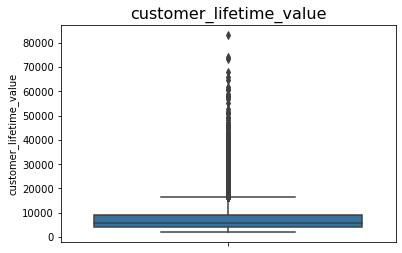

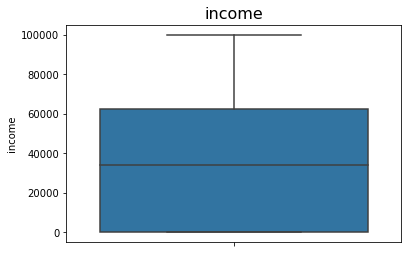

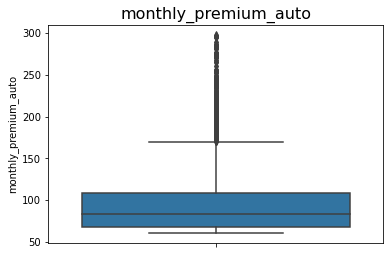

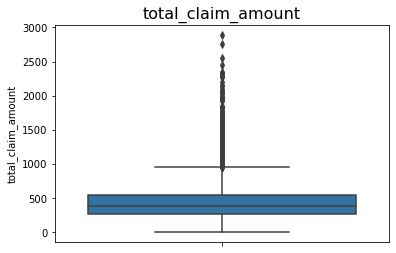

In [2374]:
contplot(continuous_df)

**Did you find outliers? Comment what you will do with them.**

There are some outliers, especially with customer_lifetime_value, monthly_premium_auto and total_claim_amount. We could do something with the customer lifetime value column, as the outliers are very much outside of the interquartile range. We won't change anything for now, however, as these are just people who make more money. They shouldn't be dropped

**Check all columns for NaN values. Decide what (if anything) you will need to do with them.**

In [2375]:
#there are 0 NaN values. Lucky me! 
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
month                            0
day_week                         0
dtype: int64

**Find all of the categorical data. Save it in a categorical_df variable.**

In [2376]:
categorical_df = customer_df.select_dtypes(include=np.object)

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_9120/2601907229.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include=np.object)


**Check for NaN values.**

In [2377]:
categorical_df.isna().sum()

state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
months_since_last_claim          0
months_since_policy_inception    0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
month                            0
day_week                         0
dtype: int64

In [2378]:
#categorical_df['effective_to_date'] = customer_df['effective_to_date']

**Check all unique values of columns.**

In [2379]:
#Thanks stackoverflow!!

unique_values = pd.Series({c: customer_df[c].unique() for c in customer_df})
unique_values

state                            [Washington, Arizona, Nevada, California, Oregon]
customer_lifetime_value          [2763.519279, 6979.535903, 12887.43165, 7645.8...
response                                                                 [No, Yes]
coverage                                                [Basic, Extended, Premium]
education                        [Bachelor, College, Master, High School or Bel...
effective_to_date                [2011-02-24T00:00:00.000000000, 2011-01-31T00:...
employmentstatus                 [Employed, Unemployed, Medical Leave, Disabled...
gender                                                                      [F, M]
income                           [56274, 0, 48767, 43836, 62902, 55350, 14072, ...
location_code                                             [Suburban, Rural, Urban]
marital_status                                         [Married, Single, Divorced]
monthly_premium_auto             [69, 94, 108, 106, 73, 67, 101, 71, 93, 110, 7...
mont

**Check dtypes. Do they all make sense as categorical data?**

In [2380]:
#yes, they all make sense being separated into categories
categorical_df.dtypes

state                            object
response                         object
coverage                         object
education                        object
employmentstatus                 object
gender                           object
location_code                    object
marital_status                   object
months_since_last_claim          object
months_since_policy_inception    object
policy_type                      object
policy                           object
renew_offer_type                 object
sales_channel                    object
vehicle_class                    object
vehicle_size                     object
month                            object
day_week                         object
dtype: object

**Does any column contain alpha and numeric data? Decide how to clean it.**

In [2381]:
customer_df.vehicle_size.value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

**Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.**

Not really, the data is relatively clean, there are no NaN values. We will, however check for outliers 

**Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?**

In [2382]:
categorical_df.groupby(["policy_type",'policy'])['gender'].count()

policy_type     policy      
Corporate Auto  Corporate L1     359
                Corporate L2     595
                Corporate L3    1014
Personal Auto   Personal L1     1240
                Personal L2     2122
                Personal L3     3426
Special Auto    Special L1        66
                Special L2       164
                Special L3       148
Name: gender, dtype: int64

We can drop the policy_type column, as the type is already included in policy column

**Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.**

In [2383]:
categorical_df.nunique()

state                              5
response                           2
coverage                           3
education                          5
employmentstatus                   5
gender                             2
location_code                      3
marital_status                     3
months_since_last_claim           36
months_since_policy_inception    100
policy_type                        3
policy                             9
renew_offer_type                   4
sales_channel                      4
vehicle_class                      6
vehicle_size                       3
month                              2
day_week                           7
dtype: int64

Plot all the categorical variables with the proper plot. What can you see?

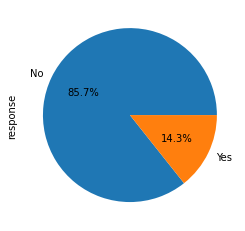

In [2384]:
resp = categorical_df.groupby("response")["response"].count()
resp.plot.pie(autopct="%.1f%%");

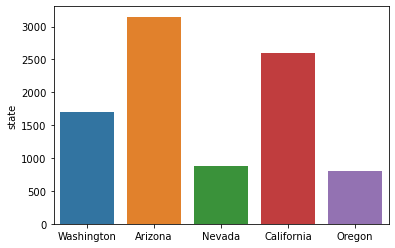

In [2385]:
state = categorical_df.groupby(["state"])['state'].count()
b = sns.barplot(data=categorical_df, x=categorical_df['state'].unique(), y=state)


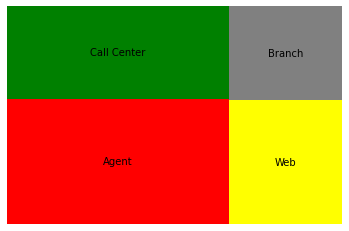

In [2386]:
squarify.plot(sizes=categorical_df['sales_channel'].value_counts(), label=categorical_df['sales_channel'].unique(),color=["red","green","yellow", "grey"])
plt.axis('off')
plt.show()

#sales_channel 

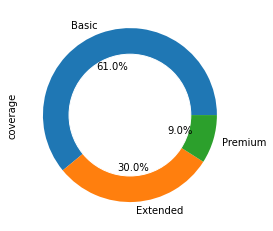

In [2387]:
cov = categorical_df.groupby("coverage")["coverage"].count()
cov.plot.pie(autopct="%.1f%%")
my_circle=plt.Circle( (0,0), 0.7, color='white')
c=plt.gcf()
c.gca().add_artist(my_circle);

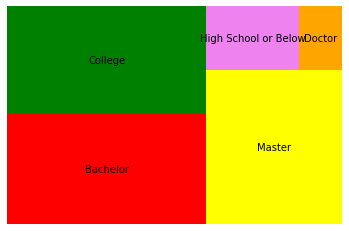

In [2388]:
squarify.plot(sizes=categorical_df['education'].value_counts(), label=categorical_df['education'].unique(),color=["red","green","yellow", "violet","orange"])
plt.axis('off')
plt.show()


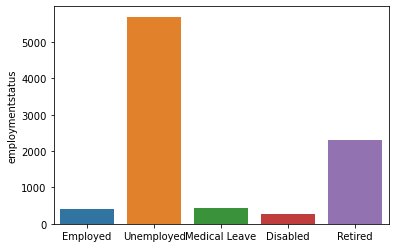

In [2389]:
empstat = categorical_df.groupby(["employmentstatus"])['employmentstatus'].count()

p = sns.barplot(data=categorical_df, x=categorical_df['employmentstatus'].unique(), y=empstat)


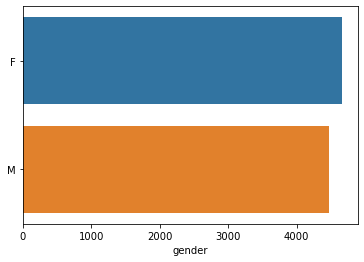

In [2390]:
gender = categorical_df.groupby(["gender"])['gender'].count()

p = sns.barplot(data=categorical_df, x=gender, y=categorical_df['gender'].unique())




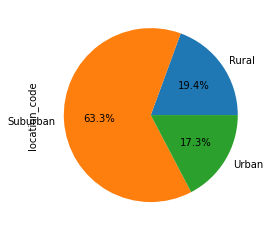

In [2391]:
location = categorical_df.groupby(['location_code'])['location_code'].count()

l = location.plot.pie(autopct="%.1f%%")


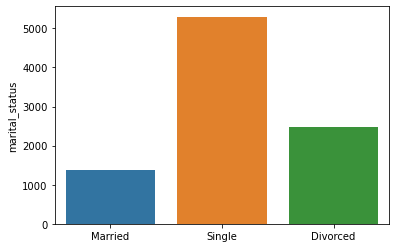

In [2392]:
marstat = categorical_df.groupby(["marital_status"])['marital_status'].count()

p = sns.barplot(data=categorical_df, x=categorical_df['marital_status'].unique(), y=marstat)


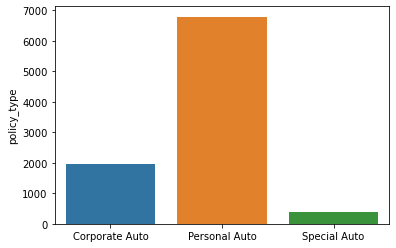

In [2393]:
polty = categorical_df.groupby(['policy_type'])['policy_type'].count()

p = sns.barplot(data=categorical_df, x=categorical_df['policy_type'].unique(), y=polty)


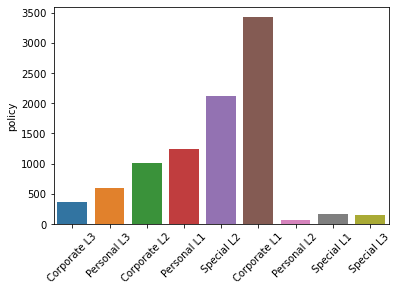

In [2394]:
pol = categorical_df.groupby(['policy'])['policy'].count()
p = sns.barplot(data=categorical_df, x=categorical_df['policy'].unique(), y=pol)
plt.xticks(rotation = 45)
plt.show()

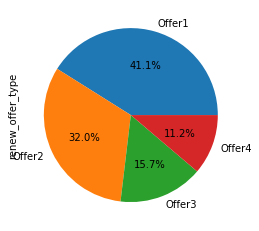

In [2395]:
rot = categorical_df.groupby(['renew_offer_type'])['renew_offer_type'].count()

l = rot.plot.pie(autopct="%.1f%%")

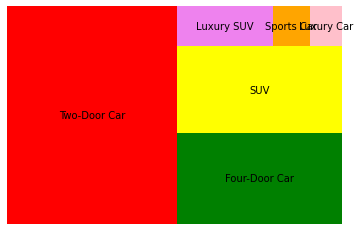

In [2396]:
squarify.plot(sizes=categorical_df['vehicle_class'].value_counts(), label=categorical_df['vehicle_class'].unique(),color=["red","green","yellow", "violet","orange",'pink'])
plt.axis('off')
plt.show()

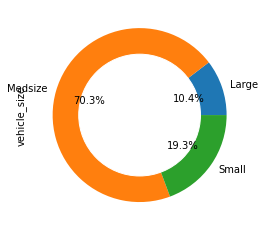

In [2397]:
veisi = categorical_df.groupby("vehicle_size")["vehicle_size"].count()
veisi.plot.pie(autopct="%.1f%%")
my_circle=plt.Circle( (0,0), 0.7, color='white')
c=plt.gcf()
c.gca().add_artist(my_circle);

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [2398]:
#I can see that the policy and policy_type columns could potentially give some problems, as well as many of the current columns as they are. I would want to cross the data to see, for example, if the marital status can have an effect on a car class, size, policy_type etc.. 

Plot time variable. Can you extract something from it?

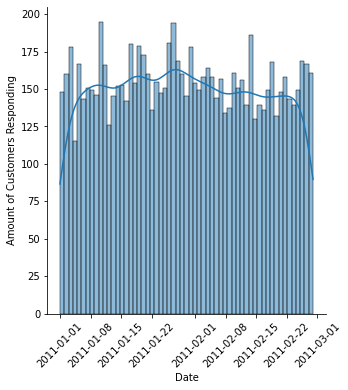

In [2399]:
sns.displot(data = customer_df, x='effective_to_date', bins=len(customer_df['effective_to_date'].unique())
            , multiple='stack'
            , kde=True).set( xlabel='Date'
                            , ylabel = 'Amount of Customers Responding')
plt.xticks(rotation = 45)
plt.show()

In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [2400]:
#iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25)
#iqr
#upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5 * iqr
#upper_limit
#outliers = continuous_df[continuous_df['total_claim_amount'] > upper_limit]
#len(outliers)

In [2401]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day_week
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,3
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,0
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,5
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,3
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2,3
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,5
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,6
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2,3


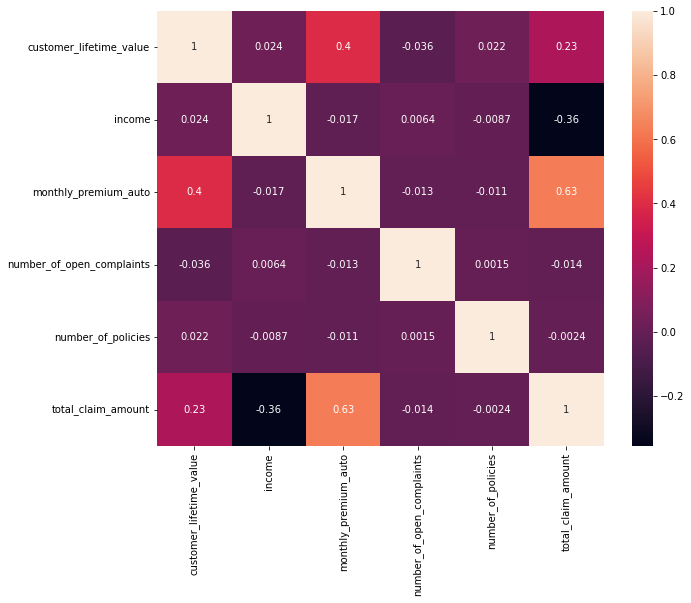

In [2402]:
corr_matrix=customer_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

**X, Y Split**

In [2403]:
X = customer_df.drop(['total_claim_amount'], axis = 1)
y = customer_df['total_claim_amount']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [2404]:
X_train.shape

(7307, 24)

Correlation Matrix

**Categorical And Numerical Split**

In [2405]:
X_train_numerical = X_train.select_dtypes(include=np.number)
X_train_categorical = X_train.select_dtypes(include=np.object)

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_9120/2477114893.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include=np.object)


In [2406]:
X_train_numerical

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,number_of_policies
5123,4768.955924,51144,61,1,9
7738,2827.559570,0,79,0,1
214,2912.892035,81097,74,0,1
8580,5138.244998,72264,64,0,9
7857,2610.369217,54737,66,0,1
...,...,...,...,...,...
5734,7334.328083,87957,61,0,2
5191,5498.940679,22520,73,0,3
5390,8992.779137,0,129,0,7
860,14635.451580,0,139,0,2


**Numerical: Split Discrete And Continuous**

In [2407]:
X_train_num_cont, X_train_num_disc = contdisc(X_train_numerical)

In [2408]:
X_train_num_disc

,number_of_open_complaints,number_of_policies
5123,1,9
7738,0,1
214,0,1
8580,0,9
7857,0,1
...,...,...
5734,0,2
5191,0,3
5390,0,7
860,0,2


In [2409]:
X_train_num_cont.isna().sum()

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
dtype: int64

**Dealing With Continuous Values**


In [2410]:
def xminmax(x):
    x_normalized = MinMaxtransformer.transform(x)
    x_normalized = pd.DataFrame(x_normalized, index = x.index, columns=x.columns)
    X_num = x_normalized
    return X_num

In [2411]:
MinMaxtransformer = MinMaxScaler().fit(X_train_num_cont)
X_train_num_cont = xminmax(X_train_num_cont)

In [2412]:
X_train_num_cont = X_train_num_cont.reset_index( drop = True)
X_train_num_cont

,customer_lifetime_value,income,monthly_premium_auto
0,0.035258,0.511537,0.000000
1,0.011416,0.000000,0.075949
2,0.012464,0.811124,0.054852
3,0.039793,0.722777,0.012658
4,0.008748,0.547474,0.021097
...,...,...,...
7302,0.066763,0.879737,0.000000
7303,0.044223,0.225243,0.050633
7304,0.087130,0.000000,0.286920
7305,0.156427,0.000000,0.329114


**Dealing With Discrete Values**

In [2413]:
X_train_num_disc['number_of_open_complaints'].unique()

array([1, 0, 2, 4, 3, 5])

In [2414]:
X_train_num_disc['number_of_policies'] = X_train_num_disc['number_of_policies'].map({1 : 0, 2 : 0.125, 3 : 0.25, 4 : 0.375, 5 : 5, 6 : 0.625, 7 : 0.75, 8 : 0.875, 9 : 1})
X_train_num_disc['number_of_open_complaints'] = X_train_num_disc['number_of_open_complaints'].map({0 : 0, 1 : 0.165, 2 : 0.33, 3 : 0.5, 4 : 0.665, 5 : 0.875})

**Concat Treated Discrete and Continuous Dataframes**

In [2415]:
X_train_num_disc = X_train_num_disc.reset_index(drop = True)
X_train_num = pd.concat([X_train_num_cont,X_train_num_disc],axis = 1)
X_train_num

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,number_of_policies
0,0.035258,0.511537,0.000000,0.165,1.000
1,0.011416,0.000000,0.075949,0.000,0.000
2,0.012464,0.811124,0.054852,0.000,0.000
3,0.039793,0.722777,0.012658,0.000,1.000
4,0.008748,0.547474,0.021097,0.000,0.000
...,...,...,...,...,...
7302,0.066763,0.879737,0.000000,0.000,0.125
7303,0.044223,0.225243,0.050633,0.000,0.250
7304,0.087130,0.000000,0.286920,0.000,0.750
7305,0.156427,0.000000,0.329114,0.000,0.125


In [2416]:
X_train_num.isna().sum()

customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
number_of_policies           0
dtype: int64

**Create a copy of the dataframe for the data wrangling.**

In [2417]:
customercopy = customer_df.copy()

**Normalize the categorical variables.**

Categorical Variables split into two types. OHE (onehotencoded) and DUM (get dummies)

In [2418]:
#one hot encode
X_train_categorical_OHE = X_train_categorical.drop(columns=['coverage', 'employmentstatus', 'location_code', 'vehicle_size'])

encoder2 = OneHotEncoder(drop='first').fit(X_train_categorical_OHE)
encoded_for_p2 = encoder2.transform(X_train_categorical_OHE).toarray()
cols = encoder2.get_feature_names(input_features=X_train_categorical_OHE.columns)
onehot_encoded_for_p2 = pd.DataFrame(encoded_for_p2, columns=cols)
onehot_encoded_for_p2.head()
X_train_categorical_OHE = onehot_encoded_for_p2

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [2419]:
#ordinal

X_train_categorical_DUM = X_train_categorical[['coverage','education', 'employmentstatus', 'location_code', 'vehicle_size']]

X_train_categorical_DUM["coverage"] = X_train_categorical_DUM["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_train_categorical_DUM["education"] = X_train_categorical_DUM["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})
X_train_categorical_DUM["employmentstatus"] = X_train_categorical_DUM["employmentstatus"].map({"Unemployed" : 0, "Medical Leave" : 1, "Disabled" : 2, "Retired" : 3, "Employed" : 4})
X_train_categorical_DUM["employmentstatus"] = X_train_categorical_DUM["employmentstatus"].fillna(0)
X_train_categorical_DUM["location_code"] = X_train_categorical_DUM["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_train_categorical_DUM["vehicle_size"] = X_train_categorical_DUM["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})


X_train_categorical_DUM = X_train_categorical_DUM.reset_index(drop = True)


MinMaxtransformer1 = MinMaxScaler().fit(X_train_categorical_DUM)
x_normalized = MinMaxtransformer1.transform(X_train_categorical_DUM)
x_normalized = pd.DataFrame(x_normalized,columns=X_train_categorical_DUM.columns)
X_train_cat_dum = x_normalized


/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_9120/1010235347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical_DUM["coverage"] = X_train_categorical_DUM["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_9120/1010235347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical_DUM["education"] = X_train_categorical_DUM["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor"

**Concatenate the tables to get the categorical table**

In [2420]:
#concatenate categorical dfs
X_train_cat_dum = X_train_categorical_DUM.reset_index(drop = True)
X_train_categorical_OHE = X_train_categorical_OHE.reset_index(drop = True)
X_train_cat = pd.concat([X_train_cat_dum,X_train_categorical_OHE],axis = 1)
X_train_cat

,coverage,education,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,month_2,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6
0,0,2,4,2,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,1,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,4,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,4,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,2,4,1,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0,1,4,1,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7303,0,1,1,1,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7304,1,0,0,1,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7305,1,2,0,1,1,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


**Concatenate the Categorical and Numerical Tables for X_train**

In [2421]:
#concat cat with num 
X_train_cat = X_train_cat.reset_index(drop = True)
X_train_num = X_train_num.reset_index(drop = True)
X_train = pd.concat([X_train_cat,X_train_num],axis = 1)
X_train

,coverage,education,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,number_of_policies
0,0,2,4,2,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.035258,0.511537,0.000000,0.165,1.000
1,1,1,0,1,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.011416,0.000000,0.075949,0.000,0.000
2,0,1,4,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012464,0.811124,0.054852,0.000,0.000
3,0,2,4,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.039793,0.722777,0.012658,0.000,1.000
4,0,2,4,1,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.008748,0.547474,0.021097,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0,1,4,1,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.066763,0.879737,0.000000,0.000,0.125
7303,0,1,1,1,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.044223,0.225243,0.050633,0.000,0.250
7304,1,0,0,1,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.087130,0.000000,0.286920,0.000,0.750
7305,1,2,0,1,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.156427,0.000000,0.329114,0.000,0.125


**Now we do the same for X_test**

In [2422]:
#Split numerical & categorical
X_test_numerical = X_test.select_dtypes(include=np.number)
X_test_categorical = X_test.select_dtypes(include=np.object)

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_9120/2081227259.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include=np.object)


**Numerical Values**

In [2423]:
#Numerical: Split Discrete And Continuous
X_test_num_cont, X_test_num_disc = contdisc(X_test_numerical)

In [2424]:
#Dealing With Continuous Values
x_normalized = MinMaxtransformer.transform(X_test_num_cont)
x_normalized = pd.DataFrame(x_normalized,columns=X_test_num_cont.columns)

In [2426]:
display(X_test_num_disc['number_of_open_complaints'].unique())
display(X_test_num_disc['number_of_policies'].unique())

array([0, 1, 2, 3, 4, 5])

array([1, 4, 5, 2, 8, 9, 3, 6, 7])

In [2427]:
#Dealing With Discrete Values
X_test_num_disc['number_of_policies'] = X_test_num_disc['number_of_policies'].map({1 : 0, 2 : 0.125, 3 : 0.25, 4 : 0.375, 5 : 5, 6 : 0.625, 7 : 0.75, 8 : 0.875, 9 : 1})
X_test_num_disc['number_of_open_complaints'] = X_test_num_disc['number_of_open_complaints'].map({0 : 0, 1 : 0.165, 2 : 0.33, 3 : 0.5, 4 : 0.665, 5 : 0.875})

In [2428]:
#Concat the continuous and discreet values into 1 dataframe
X_test_num_disc = X_test_num_disc.reset_index(drop = True)
X_test_num_cont = X_test_num_cont.reset_index(drop = True)
X_test_num = pd.concat([X_test_num_cont,X_test_num_disc],axis = 1)
X_test_num



,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,number_of_policies
0,4222.631209,74585,106,0.000,0.000
1,5514.344018,23218,71,0.000,0.375
2,3808.122147,94903,94,0.000,0.000
3,7914.823110,77153,99,0.165,5.000
4,7931.722181,23769,69,0.000,0.125
...,...,...,...,...,...
1822,8688.754812,59098,110,0.000,0.250
1823,7623.580733,69900,64,0.000,0.125
1824,4660.399573,89834,116,0.000,0.000
1825,2089.337182,0,63,0.165,0.000


In [2429]:
X_test_num_disc.isna().sum()

number_of_open_complaints    0
number_of_policies           0
dtype: int64

**Categorical values**



In [2430]:
#one hot encode
X_test_categorical_OHE = X_test_categorical.drop(columns=['coverage', 'employmentstatus', 'location_code', 'vehicle_size']).reset_index(drop = True)


encoded_for_p2 = encoder2.transform(X_test_categorical_OHE).toarray()
cols = encoder2.get_feature_names(input_features=X_test_categorical_OHE.columns)
onehot_encoded_for_p2 = pd.DataFrame(encoded_for_p2, columns=cols)
onehot_encoded_for_p2.head()
X_test_categorical_OHE = onehot_encoded_for_p2


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [2431]:
#ordinal
X_test_categorical_DUM = X_test_categorical[['coverage', 'employmentstatus', 'location_code', 'vehicle_size', 'education']]

X_test_categorical_DUM["coverage"] = X_test_categorical_DUM["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_test_categorical_DUM["education"] = X_test_categorical_DUM["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})
X_test_categorical_DUM["employmentstatus"] = X_test_categorical_DUM["employmentstatus"].map({"Unemployed" : 0, "Medical Leave" : 1, "Disabled" : 2, "Retired" : 3, "Employed" : 4})
X_test_categorical_DUM["employmentstatus"] = X_test_categorical_DUM["employmentstatus"].fillna(0)
X_test_categorical_DUM["location_code"] = X_test_categorical_DUM["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_test_categorical_DUM["vehicle_size"] = X_test_categorical_DUM["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_9120/1395665654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_categorical_DUM["coverage"] = X_test_categorical_DUM["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_9120/1395665654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_categorical_DUM["education"] = X_test_categorical_DUM["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2

In [2432]:
#concatenate categorical dfs
X_test_categorical_DUM = X_test_categorical_DUM.reset_index(drop = True)
X_test_categorical_OHE = X_test_categorical_OHE.reset_index(drop = True)
X_test_cat = pd.concat([X_test_categorical_DUM,X_test_categorical_OHE],axis = 1)
X_test_cat

,coverage,employmentstatus,location_code,vehicle_size,education,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,month_2,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6
0,0,4,0,1,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,4,1,1,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,4,1,0,1,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,4,2,1,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,1,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0,4,1,1,1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1823,0,4,0,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1824,0,4,0,1,2,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1825,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2433]:
#concat categorical with numerical
X_test_cat = X_test_cat.reset_index(drop = True)
X_test_num = X_test_num.reset_index(drop = True)
X_test = pd.concat([X_test_cat,X_test_num],axis = 1)
X_test


,coverage,employmentstatus,location_code,vehicle_size,education,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,number_of_policies
0,0,4,0,1,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4222.631209,74585,106,0.000,0.000
1,0,4,1,1,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5514.344018,23218,71,0.000,0.375
2,1,4,1,0,1,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,3808.122147,94903,94,0.000,0.000
3,1,4,2,1,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,7914.823110,77153,99,0.165,5.000
4,0,2,1,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,7931.722181,23769,69,0.000,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0,4,1,1,1,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,8688.754812,59098,110,0.000,0.250
1823,0,4,0,2,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,7623.580733,69900,64,0.000,0.125
1824,0,4,0,1,2,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4660.399573,89834,116,0.000,0.000
1825,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2089.337182,0,63,0.165,0.000


In [2434]:
X_test.isna().sum()

coverage                     0
employmentstatus             0
location_code                0
vehicle_size                 0
education                    0
                            ..
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
number_of_policies           0
Length: 184, dtype: int64

**Fit The Linear Regression Model**

In [2435]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

Try a simple linear regression with all the data to see whether we are getting good results.



In [2436]:
predictions = lm.predict(X_train)
predictions_test = lm.predict(X_test)

print('Train R2 Score :',r2_score(y_train, predictions))
print('Test R2 Score :',r2_score(y_test, predictions_test))

Train R2 Score : 0.6414947191675877
Test R2 Score : -6.853741219849909e+21


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


In [2446]:
def models_automation(models, X_tr, y_tr, X_te, y_te):
        for model in models:
            model.fit(X_train,y_train)
            print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")



Use the function to check LinearRegressor and KNeighborsRegressor.

In [2450]:
model_list = [LinReg(), SGDRegressor(), KNeighborsRegressor(), MLPRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]
models_automation(model_list, X_train, y_train, X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


LinearRegression: Train -> 0.6414947191675877, Test -> -6.853741219849909e+21
SGDRegressor: Train -> 0.6358808626247587, Test -> -846613943.6580962


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


KNeighborsRegressor: Train -> 0.6627551771394016, Test -> -3.2513199029894393


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


MLPRegressor: Train -> 0.8115420961802264, Test -> -138975983.7141452
DecisionTreeRegressor: Train -> 1.0, Test -> -14.325309805261028
RandomForestRegressor: Train -> 0.9786917989220054, Test -> -13.963894881832356


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
